## Investing bot
# Data Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('stock_data.csv')

# Divide stocks according to their perspective field
df_agriculture = df.loc[df['Field'] == 'Agriculture']

df_minerals = df.loc[df['Field'] == 'Minerals']
df_minerals.index = np.arange(len(df_minerals))

df_energy = df.loc[df['Field'] == 'Energy']
df_energy.index = np.arange(len(df_energy))

df_construction = df.loc[df['Field'] == 'Construction']
df_construction.index = np.arange(len(df_construction))

df_manufacturing = df.loc[df['Field'] == 'Manufacturing']
df_manufacturing.index = np.arange(len(df_manufacturing))

df_wholesale = df.loc[df['Field'] == 'Wholesale']
df_wholesale.index = np.arange(len(df_wholesale))

df_retail = df.loc[df['Field'] == 'Retail']
df_retail.index = np.arange(len(df_retail))

df_transport = df.loc[df['Field'] == 'Transport']
df_transport.index = np.arange(len(df_transport))

df_tech = df.loc[df['Field'] == 'Technology']
df_tech.index = np.arange(len(df_tech))

df_hotel = df.loc[df['Field'] == 'Hotel']
df_hotel.index = np.arange(len(df_hotel))

In [4]:
df_all = [df_agriculture, df_minerals, df_energy, df_construction, df_manufacturing, df_wholesale, df_retail, df_transport, df_tech, df_hotel]

df_all_name = []
for df_name in df_all:
    df_all_name.append(df_name.iloc[:, 0].to_frame())

# Get all EPS value
''' Earnings per share (EPS) is a company's net profit divided by the number of common shares it has outstanding.
 EPS indicates how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value.
 The higher a company's EPS, the more profitable it is considered to be. '''

df_all_eps = []
for df_eps in df_all:
    df_all_eps.append(df_eps.iloc[:, 2:14])

# Get all BV value
'''The book value of a company is the net difference between that company's total assets and total liabilities, where book value reflects 
the total value of a company's assets that shareholders of that company would receive if the company were to be liquidated.'''
df_all_bv = []
for df_bv in df_all:
    df_all_bv.append(df_bv.iloc[:, 14:26])

# Get all PE value
'''The price-earnings (P/E) ratio relates a company's share price to its earnings per share.
    A high P/E ratio could mean that a company's stock is over-valued, or else that investors are expecting high growth rates in the future.
    Companies that have no earnings or that are losing money do not have a P/E ratio since there is nothing to put in the denominator.'''
df_all_pe = []
for df_pe in df_all:
    df_all_pe.append(df_pe.iloc[:, 26:38])

# Get all ROA value
'''Return on assets (ROA) is an indicator of how well a company utilizes its assets in terms of profitability.
    ROA is best used when comparing similar companies or by comparing a company to its own previous performance.
    ROA does not take into account a company’s debt, while return on equity (ROE) does—if a company carries no debt, its shareholders' equity and its total assets will be the same and ROA would equal ROE.'''
df_all_roa = []
for df_roa in df_all:
    df_all_roa.append(df_roa.iloc[:, 38:50])

# Get all ROE value
'''Return on equity (ROE) measures a corporation's profitability in relation to stockholders’ equity.
    Whether an ROE is considered satisfactory will depend on what is normal for the industry or company peers.
    As a shortcut, investors can consider an ROE near the long-term average of the S&P 500 (14%) as an acceptable ratio and anything less than 10% as poor.'''
df_all_roe = []
for df_roe in df_all:
    df_all_roe.append(df_roe.iloc[:, 50:62])

# Get all ROS value
'''Return on sales (ROS) is a measure of how efficiently a company turns sales into profits.
    ROS is calculated by dividing operating profit by net sales.
    ROS is only useful when comparing companies in the same line of business and of roughly the same size.'''
df_all_ros = []
for df_ros in df_all:
    df_all_ros.append(df_ros.iloc[:, 62:74])

# Get all GOS value
df_all_gos = []
for df_gos in df_all:
    df_all_gos.append(df_gos.iloc[:, 74:86])

# Get all DAR value
df_all_dar = []
for df_dar in df_all:
    df_all_dar.append(df_dar.iloc[:, 86:98])

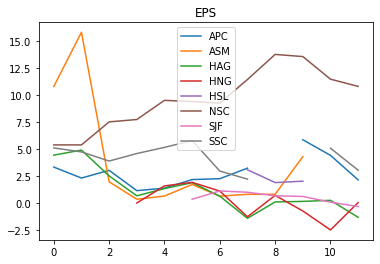

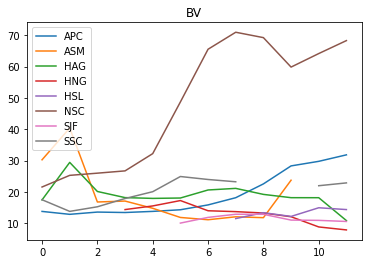

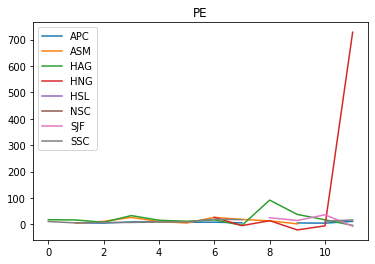

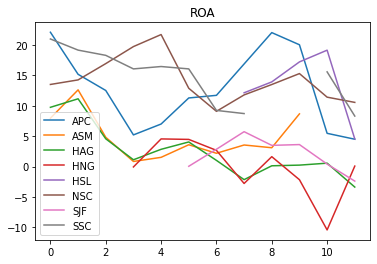

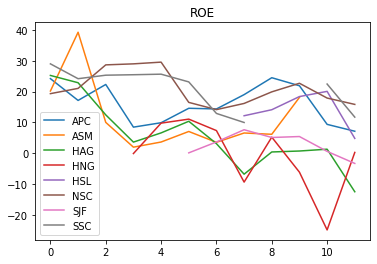

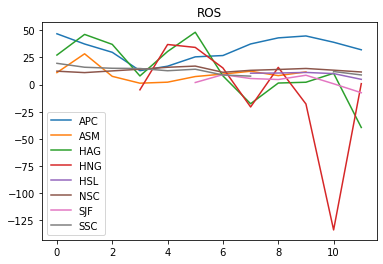

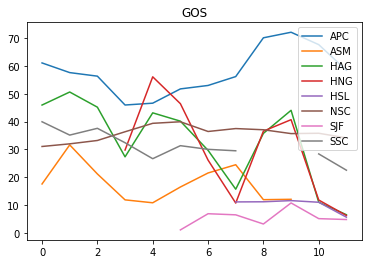

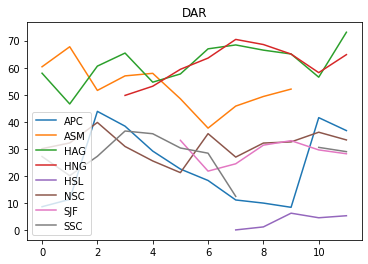

<Figure size 432x288 with 0 Axes>

In [125]:
'''Visualization'''
'''This cell is designed so that data can be visualized to look for similar trends of good stock and bad stock, whether they have anything in common'''

i = 0
j = 0
names = ['EPS', 'BV', 'PE', 'ROA', 'ROE', 'ROS', 'GOS', 'DAR']
df_all_metrics = [df_all_eps, df_all_bv, df_all_pe, df_all_roa, df_all_roe, df_all_ros, df_all_gos, df_all_dar]

for df_metric in df_all_metrics:
    for row in df_metric[0][:].to_numpy():
        plt.plot(row, label=df_all_name[0][i])
        i += 1 
    plt.legend()
    plt.title(names[j])
    j += 1
    i = 0
    plt.figure()

In [50]:
# Feature Engineering - Functions

'''Decide whether a metric has any sudden change. 
In this project, after sampling and compairing various stocks, a sudden change is considered to be a double or half in value'''
SUDDEN_CHANGE = 2
def is_sudden_change(hist_data):
    for i in range(len(hist_data) - 1):
        if hist_data[i] != np.nan or hist_data[i + 1] != np.nan:
            if hist_data[i] > SUDDEN_CHANGE * hist_data[i + 1] or hist_data[i] < (1/SUDDEN_CHANGE) * hist_data[i + 1]:
                return True
        else:
            continue
    return False

def is_sudden_bv_df(all_stock_years_bv_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_bv_df)):
        curr_bool.append(is_sudden_change(all_stock_years_bv_df.iloc[[i]].values))
    
    df_all_name['Sudden_BV?'] = curr_bool
    return df_all_name


'''Decide whether a metric data has a downward trend.
A downward trend is decided when the number experiences a lower preceding number for 5 consecutive years'''
CONSECUTIVE_STREAK = 3
def is_downward(hist_data):
    count = 0
    for i in range(len(hist_data) - 1):
        if hist_data[i] != np.nan or hist_data[i + 1] != np.nan:
            if hist_data[i] > hist_data[i + 1]:
                count += 1
                if count >= CONSECUTIVE_STREAK:
                    return True
            else: 
                count = 0
        else:
            count = 0
    return False

def is_downward_roa_df(all_stock_years_roa_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_roa_df)):
        curr_bool.append(is_downward(all_stock_years_roa_df.iloc[[i]].values))
    
    df_all_name['Downward_ROA?'] = curr_bool
    return df_all_name

def is_downward_roe_df(all_stock_years_roe_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_roe_df)):
        curr_bool.append(is_downward(all_stock_years_roe_df.iloc[[i]].values))
    
    df_all_name['Downward_ROE?'] = curr_bool
    return df_all_name


'''Decide whether there is a negative number in historical data.'''
def is_negative(hist_data):
    hist_data = hist_data[0]
    for data in hist_data:
        if data == np.nan:
            continue
        else:
            if data < 0:
                return True
    return False

def is_negative_eps_df(all_stock_years_eps_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_eps_df)):
        curr_bool.append(is_negative(all_stock_years_eps_df.iloc[[i]].values))
    
    df_all_name['Negative_EPS?'] = curr_bool
    return df_all_name

def is_negative_roa_df(all_stock_years_roa_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_roa_df)):
        curr_bool.append(is_negative(all_stock_years_roa_df.iloc[[i]].values))
    
    df_all_name['Negative_ROA?'] = curr_bool
    return df_all_name
            
def is_negative_roe_df(all_stock_years_roe_df, df_all_name):
    curr_bool = []
    for i in range(len(all_stock_years_roe_df)):
        curr_bool.append(is_negative(all_stock_years_roe_df.iloc[[i]].values))
    
    df_all_name['Negative_ROE?'] = curr_bool
    return df_all_name


'''Decide whether a stock's number is relatively to high from its peers' values
A number is consider too high from its peer when it is 10 times higher than the minimum value'''
THRESHOLD = 5
def is_too_high_to_peer(all_stock_years_df, df_all_name):
    all_stock_years_df[all_stock_years_df < 0] = np.nan
    column_names = all_stock_years_df.columns
    min_list = all_stock_years_df.min()
    
    # create a list of boolean for stocks
    curr_bool = []
    for i in range(len(all_stock_years_df)):
        curr_bool.append(False)

    # loop to identify whether a stock is too high in any years
    for i in range(len(column_names)):
        for row in range(len(all_stock_years_df)):
            if all_stock_years_df.at[row, column_names[i]] > THRESHOLD * min_list[i]:
                curr_bool[row] = curr_bool[row] or True    
    
    df_all_name['PE_too_high'] = curr_bool
    return df_all_name

In [51]:
# Feature Engineering - apply to existing data
for i in range(len(df_all_name)):
    df_all_name[i] = is_negative_eps_df(df_all_eps[i], df_all_name[i])
    df_all_name[i] = is_negative_roa_df(df_all_roa[i], df_all_name[i])
    df_all_name[i] = is_negative_roe_df(df_all_roe[i], df_all_name[i])
    df_all_name[i] = is_downward_roa_df(df_all_roa[i], df_all_name[i])
    df_all_name[i] = is_downward_roe_df(df_all_roe[i], df_all_name[i])
    df_all_name[i] = is_sudden_bv_df(df_all_bv[i], df_all_name[i])
    df_all_name[i] = is_too_high_to_peer(df_all_pe[i], df_all_name[i])
    

# Apply Machine Learning Model
Unsupervised learning model used: KMeans

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_all_name[0].iloc[:, 1:])
kmeans.labels_


array([0, 0, 1, 1, 0, 0, 1, 0])

In [53]:
df_all_name[0]

,Stock Name,Negative_EPS?,Negative_ROA?,Negative_ROE?,Downward_ROA?,Downward_ROE?,Sudden_BV?,PE_too_high
0,APC,False,False,False,False,False,False,False
1,ASM,False,False,False,False,False,False,False
2,HAG,True,True,True,False,False,False,True
3,HNG,True,True,True,False,False,False,True
4,HSL,False,False,False,False,False,False,False
5,NSC,False,False,False,False,False,False,False
6,SJF,True,True,True,False,False,False,True
7,SSC,False,False,False,False,False,False,False


In [37]:
df_all_name[1]

,Stock Name,Negative_EPS?,Negative_ROA?,Negative_ROE?,Downward_ROA?,Downward_ROE?,Sudden_BV?,PE_too_high
0,BMC,False,False,False,False,False,False,False
1,C32,False,False,False,False,False,False,False
2,DHA,False,False,False,False,False,False,False
3,DHM,True,True,True,False,False,False,False
4,KSB,False,False,False,False,False,False,False
5,LCM,True,True,True,False,False,False,True
6,MDG,True,True,True,False,False,False,True
7,NNC,False,False,False,False,False,False,False
8,PVD,False,False,False,False,False,False,True
9,TNT,True,True,True,False,False,False,True
